## All Life Bank Clustering Analysis


#### Context
AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help

 

#### Objective
To identify different segments in the existing customer, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers.

 

#### Data Description
The data provided is of various customers of a bank and their financial attributes like credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries (including visiting the bank, online and through a call center).

#### Data Dictionary

- Sl_No: Primary key of the records
- Customer Key: Customer identification number
- Average Credit Limit: Average credit limit of each customer for all credit cards
- Total credit cards: Total number of credit cards possessed by the customer
- Total visits bank: Total number of visits that customer made (yearly) personally to the bank
- Total visits online: Total number of visits or online logins made by the customer (yearly)
- Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)
 
#### Key Questions
- Which variables should be used for clustering?
- How many different groups/clusters of countries can be found from the data?
- How do the different clusters vary?
- How to use PCA to retain the components which explain 90% variance?
- How to perform clustering using the components obtained from PCA?

#### Goal
The overarching goal is to segment customers for more effective targeting

### Import Libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

In [2]:
df = pd.read_excel("Credit+Card+Customer+Data.xlsx")

In [3]:
data = df.copy()

In [4]:
df.shape

(660, 7)

The dataset has 660 observations and 7 features

In [5]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [6]:
df.tail()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


In [7]:
df.sample(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
180,181,55892,10000,1,0,3,5
453,454,70707,74000,4,4,0,3
377,378,61994,19000,5,2,0,4
515,516,27476,37000,4,4,2,2
446,447,65747,70000,5,4,0,2
514,515,48692,30000,5,2,2,3
658,659,80655,172000,10,1,15,0
396,397,77954,73000,6,4,2,0
62,63,70248,5000,1,0,2,4
392,393,78912,6000,4,4,0,0


In [8]:
# Let's see unique values
cols = df.columns

for col in cols:
    print("Unique values in the column '{}' are \n\n".format(col), df[col].unique())
    print("-" * 100)

Unique values in the column 'Sl_No' are 

 [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236

In [9]:
#statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


In [10]:
# general info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [11]:
data.duplicated().sum()

0

In [12]:
# let us check the percentage of missing values by column: round to 2 digits
round(df.isnull().sum() / df.isnull().count() * 100, 2)

Sl_No                  0.0
Customer Key           0.0
Avg_Credit_Limit       0.0
Total_Credit_Cards     0.0
Total_visits_bank      0.0
Total_visits_online    0.0
Total_calls_made       0.0
dtype: float64

In [13]:
# number of unique values in each column
df.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

In [14]:
df["Avg_Credit_Limit"].describe()

count       660.000000
mean      34574.242424
std       37625.487804
min        3000.000000
25%       10000.000000
50%       18000.000000
75%       48000.000000
max      200000.000000
Name: Avg_Credit_Limit, dtype: float64

* The IQR is 38000
* the mean valuevalue is about 34600
* data is skewed right

In [15]:
# the dataset is small so I will scan the columns quickly
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

     Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0        1         87073            100000                   2   
1        2         38414             50000                   3   
2        3         17341             50000                   7   
3        4         40496             30000                   5   
4        5         47437            100000                   6   
5        6         58634             20000                   3   
6        7         48370            100000                   5   
7        8         37376             15000                   3   
8        9         82490              5000                   2   
9       10         44770              3000                   4   
10      11         52741             10000                   4   
11      12         52326             13000                   3   
12      13         92503             11000                   1   
13      14         25084              9000                   1   
14      15

In [16]:
# dropping column with no predictive value
df.drop('Sl_No', axis = 1, inplace = True)

In [17]:
df.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,87073,100000,2,1,1,0
1,38414,50000,3,0,10,9
2,17341,50000,7,1,3,4
3,40496,30000,5,1,1,4
4,47437,100000,6,0,12,3


## EDA - Univariate and Bivariate Analyses

In [18]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

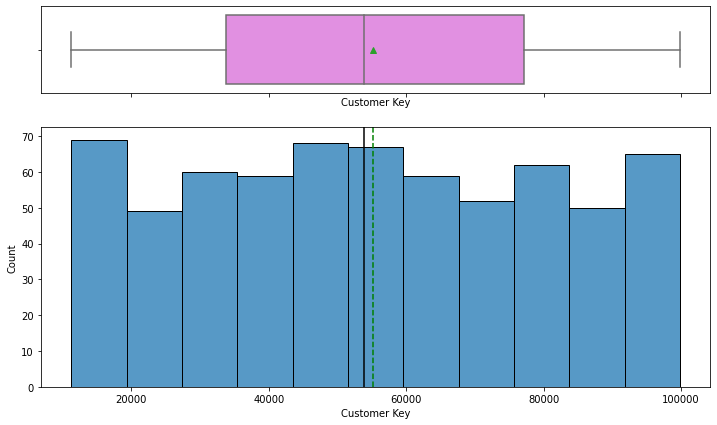

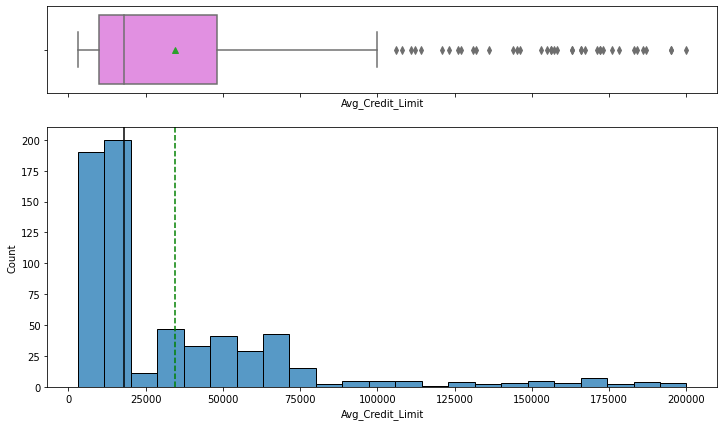

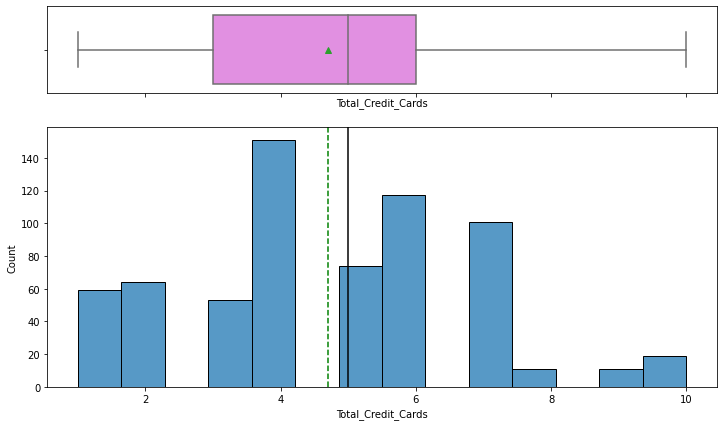

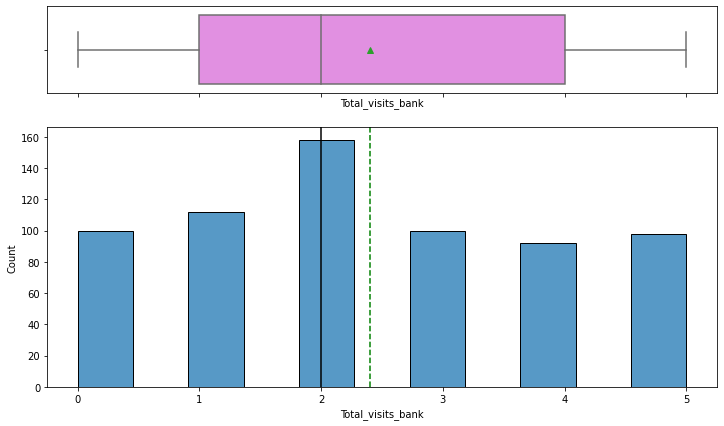

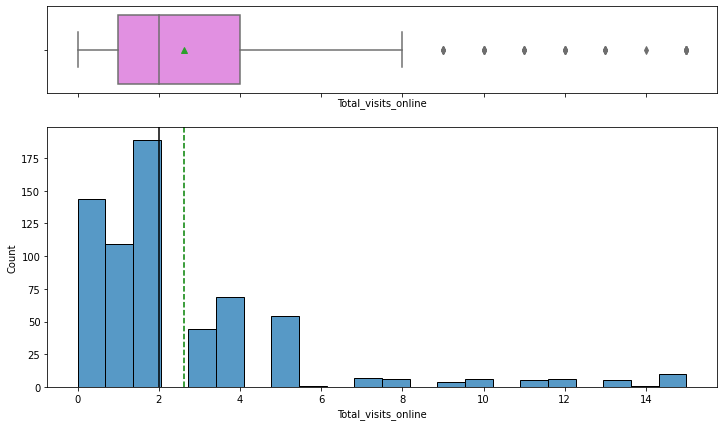

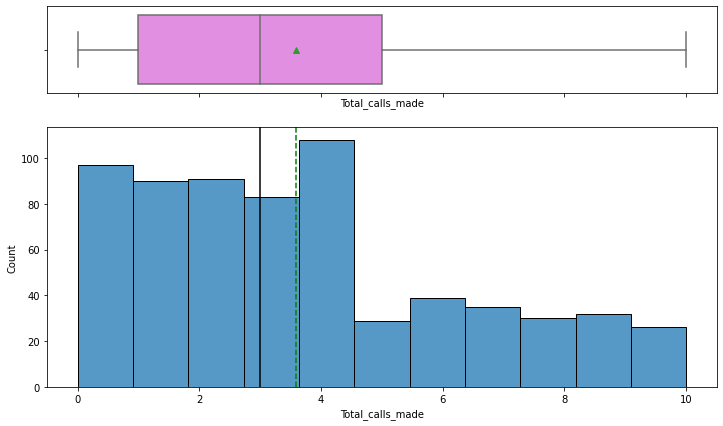

In [19]:
# getting a list of columns that are number type and passing to for loop for hist_boxplots
numeric_cols = df.select_dtypes(include=np.number)
numeric_cols.columns

for col in numeric_cols.columns:
    histogram_boxplot(df, col)

* avg credit limit is skewed right with many outliers
* total credit cards is multimodal with larger clusters around 4, 6, and 7
* total visits is approximately normally distributed
* total visits online is skewed right with numerous outliers
* total calls made is skewed right

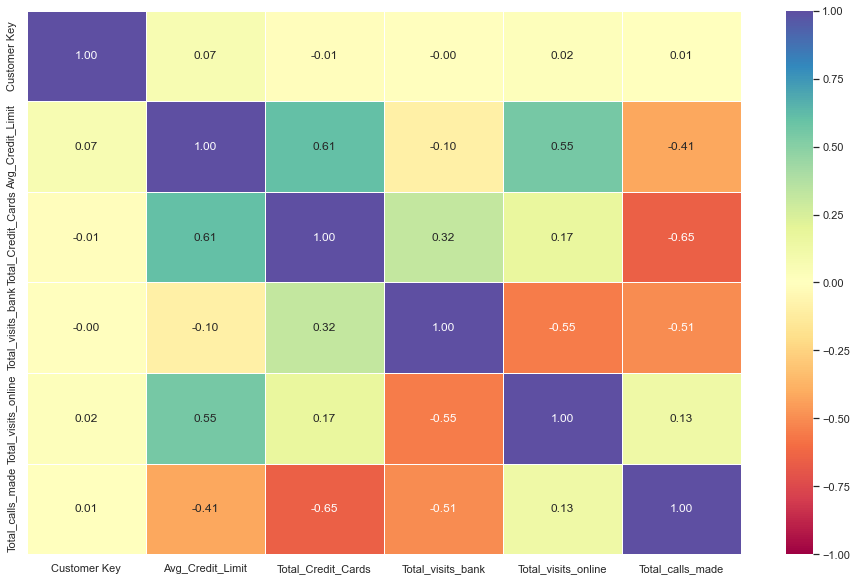

In [20]:
# check correlation between our variables
sns.set(rc={'figure.figsize':(16,10)})
sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=True,
            cmap="Spectral", 
            fmt=".2f", 
            vmin=-1, 
            vmax=1)
plt.show()

- total credit cards is moderately inversely correlated to total calls made
- total visits to bank and total visits online are moderately inversely correlated
- total visits online and total credit cards are moderaly positively correlated with average credit limit
- total credit cards is moderately positively correlated with average credit limit
- with moderate correlation, I would like to take steps to reduce multicollinearity

#### Preparing a df that is treated for outliers

In [21]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [22]:
# create a df that is treated for outliers
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df_ol = treat_outliers_all(df, numerical_col)

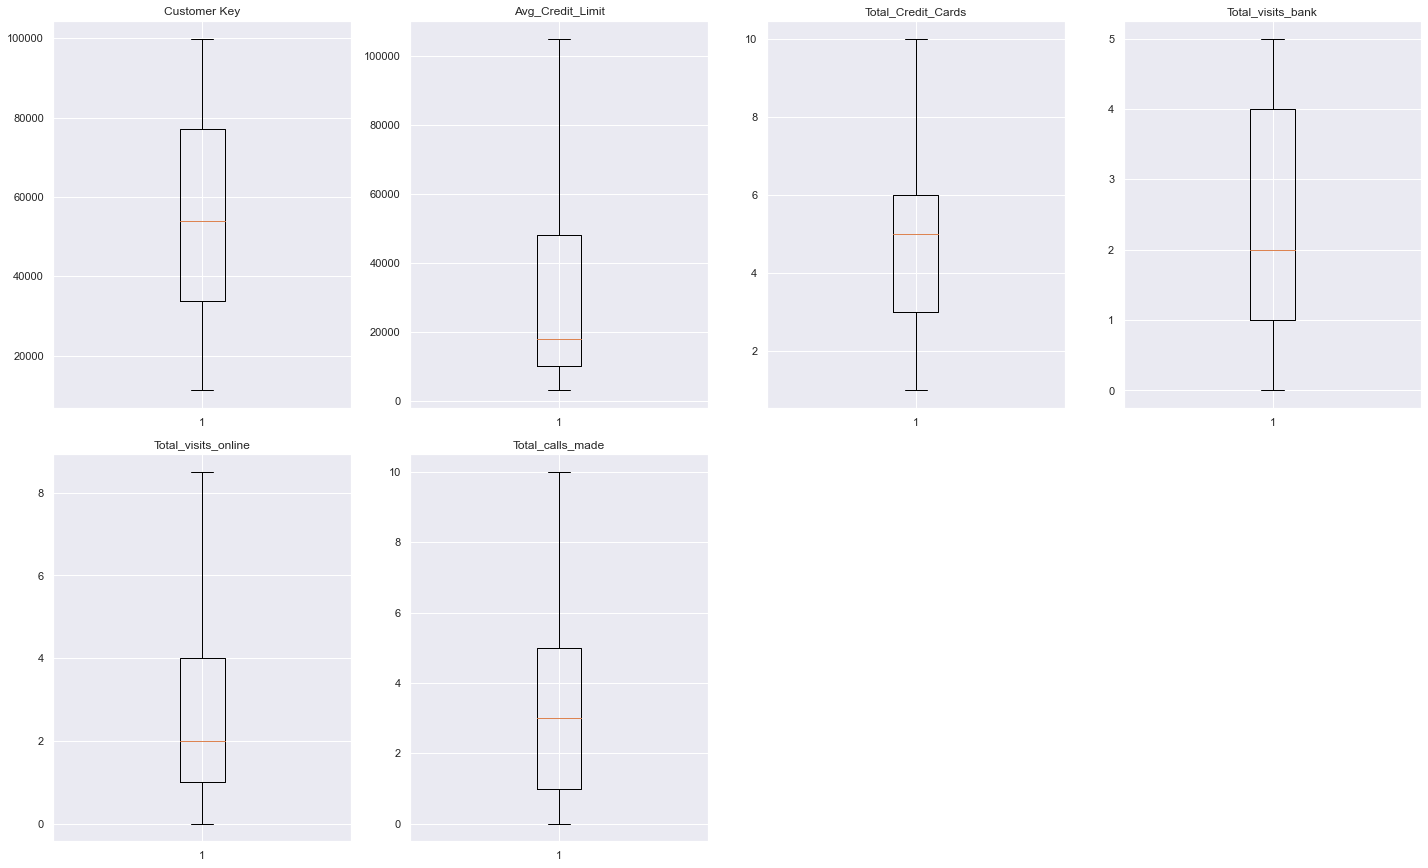

In [23]:
# let's look at box plot to see if outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df_ol[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show() 

In [24]:
data.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

## K Means Clustering

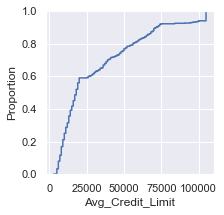

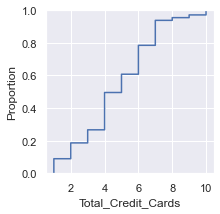

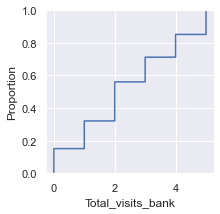

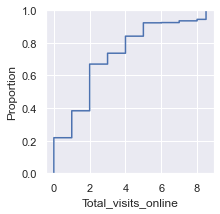

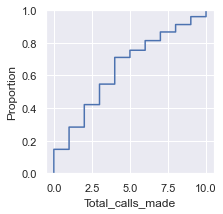

In [25]:
cols_cdf = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

for col in cols_cdf: 
    plt.figure(figsize = (3,3))
    sns.ecdfplot(data = df, x = col)

About 80% of observations are characterized by: 
* 50000 credit limit
* 6 to 7 cards
* about 4 bank visits
* about 4 online visits
* about 6 calls made

### Scaling our dataset

In [26]:
scaler = StandardScaler()
scaled_df_ol = pd.DataFrame(scaler.fit_transform(df_ol), 
            columns = df_ol.columns,
                        )

In [27]:
scaled_df_ol.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Key,660.0,1.076580e-17,1.000758,-1.713365,-0.832392,-0.049474,0.861479,1.745585
Avg_Credit_Limit,660.0,4.306320e-17,1.000758,-1.006385,-0.760640,-0.479788,0.573406,2.574474
Total_Credit_Cards,660.0,4.306320e-17,1.000758,-1.710864,-0.787585,0.135694,0.597334,2.443892
Total_visits_bank,660.0,-4.306320e-17,1.000758,-1.473731,-0.860451,-0.247170,0.979390,1.592670
Total_visits_online,660.0,-9.689219e-17,1.000758,-1.063178,-0.619767,-0.176357,0.710465,2.705813
Total_calls_made,660.0,-8.612639e-17,1.000758,-1.251537,-0.902271,-0.203739,0.494794,2.241125


In [28]:
# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to compute distances
from scipy.spatial.distance import cdist

#### Determining number of clusters with an elbow chart

Number of Clusters: 1 	Average Distortion: 2.311738174058943
Number of Clusters: 2 	Average Distortion: 1.814381952973524
Number of Clusters: 3 	Average Distortion: 1.5356217245577075
Number of Clusters: 4 	Average Distortion: 1.3999257208457676
Number of Clusters: 5 	Average Distortion: 1.3117448975172892
Number of Clusters: 6 	Average Distortion: 1.253804990801672


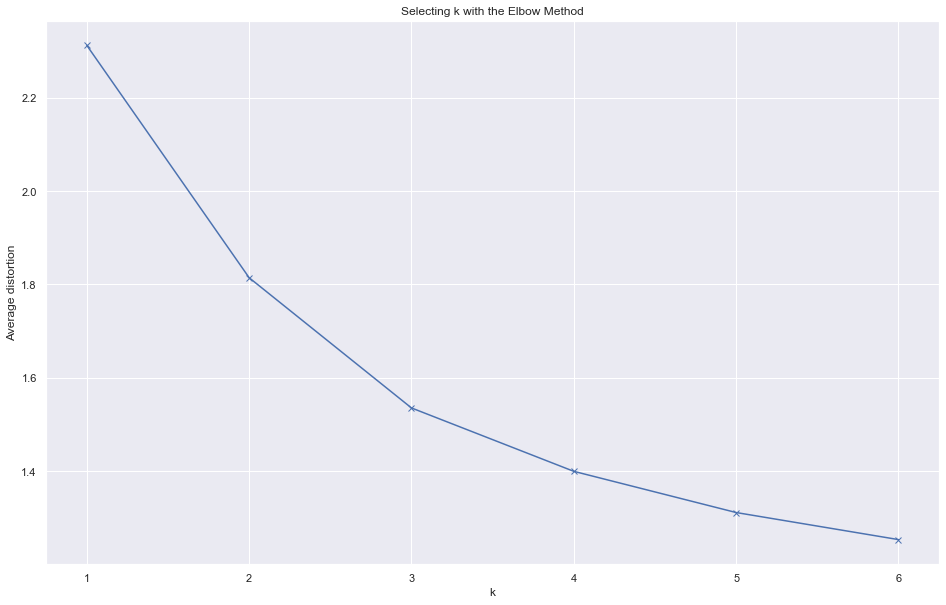

In [29]:
clusters = range(1, 7)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(scaled_df_ol)
    prediction = model.predict(scaled_df_ol)
    distortion = (
        sum(
            np.min(cdist(scaled_df_ol, model.cluster_centers_, "euclidean"), axis=1)
        )
        / scaled_df_ol.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("Selecting k with the Elbow Method")
plt.show()

We can see that an appropriate number of clusters could be either 3 or 4

#### Let us use the silhouette score also

For n_clusters = 2, the silhouette score is 0.3454829798589436)
For n_clusters = 3, the silhouette score is 0.42412535943374324)
For n_clusters = 4, the silhouette score is 0.32367174435683005)
For n_clusters = 5, the silhouette score is 0.27816234329936174)
For n_clusters = 6, the silhouette score is 0.2572169484724503)
For n_clusters = 7, the silhouette score is 0.24581674563181485)
For n_clusters = 8, the silhouette score is 0.24720911780765512)
For n_clusters = 9, the silhouette score is 0.23489011038279875)


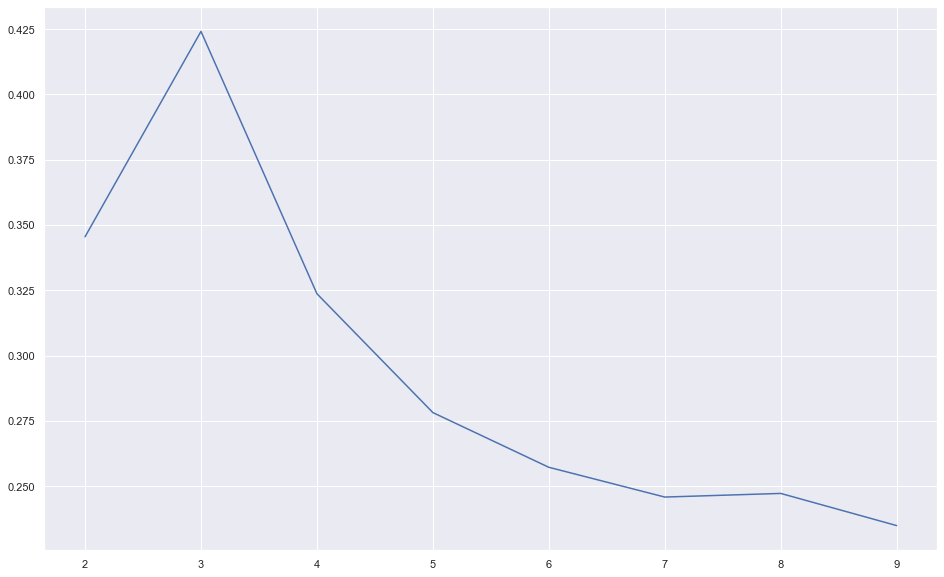

In [30]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((scaled_df_ol))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(scaled_df_ol, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

We can observe that the score is highest for 3 clusters - we will proceed with 3

In [31]:
# # finding optimal no. of clusters with silhouette coefficients
# visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
# visualizer.fit(scaled_df_ol)
# visualizer.show()

In [32]:
# let's take what we learned as number of clusters
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(scaled_df_ol)

KMeans(n_clusters=3, random_state=0)

Let us add to both the scaled df and the original df

In [33]:
# adding kmeans cluster labels to the original and scaled dataframes

df["K_means_segments"] = kmeans.labels_
scaled_df_ol["K_means_segments"] = kmeans.labels_

In [34]:
df.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments
0,87073,100000.0,2,1,1.0,0,2
1,38414,50000.0,3,0,8.5,9,1
2,17341,50000.0,7,1,3.0,4,2
3,40496,30000.0,5,1,1.0,4,2
4,47437,100000.0,6,0,8.5,3,0


In [35]:
scaled_df_ol.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments
0,1.246920,2.398942,-1.249225,-0.860451,-0.619767,-1.251537,2
1,-0.653203,0.643619,-0.787585,-1.473731,2.705813,1.891859,1
2,-1.476098,0.643619,1.058973,-0.860451,0.267054,0.145528,2
3,-0.571901,-0.058511,0.135694,-0.860451,-0.619767,0.145528,2
4,-0.300857,2.398942,0.597334,-1.473731,2.705813,-0.203739,0


### Cluster Profiles

In [36]:
KMcluster_profile = df.groupby("K_means_segments").mean()

In [37]:
KMcluster_profile["count_in_each_segments"] = (
    df.groupby("K_means_segments")["Avg_Credit_Limit"].count().values
)

In [38]:
KMcluster = KMcluster_profile.style.highlight_max(color = "lightgreen", axis = 0)
KMcluster

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
K_means_segments,,,,,,,
0,56708.760000,102660.000000,8.740000,0.600000,8.180000,1.080000,50
1,55239.830357,12174.107143,2.410714,0.933036,3.546875,6.870536,224
2,54881.329016,33782.383420,5.515544,3.489637,0.981865,2.000000,386


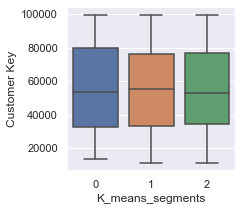

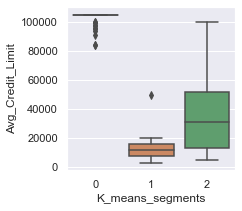

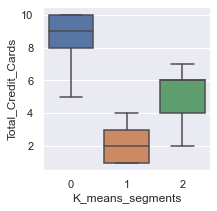

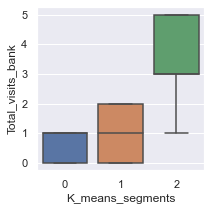

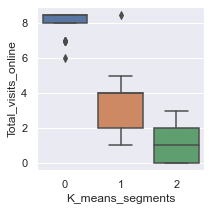

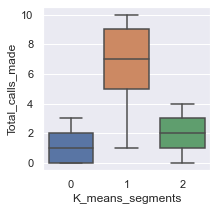

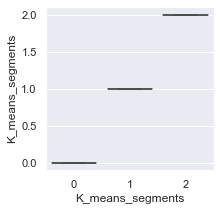

In [39]:
for i, col in enumerate(df.columns):
    plt.figure(i, figsize = (3,3))
    sns.boxplot(x="K_means_segments", y = col, data=df)

<AxesSubplot:xlabel='K_means_segments'>

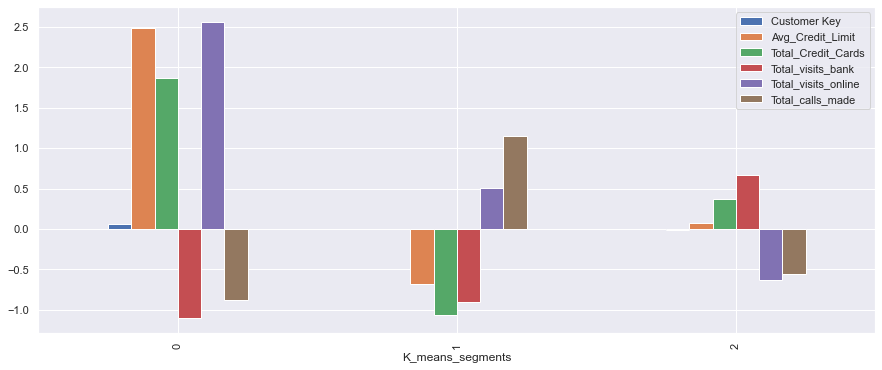

In [40]:
scaled_df_ol.groupby("K_means_segments").mean().plot.bar(figsize=(15, 6))

Cluster 0 is characterized by: 
* Above average credit limits, total credit cards, and total online visits
* below average total visits to physical locations and total calls made
* insight: these are highly engaged customers who have more activity and require less physical touchpoints

Cluster 1 is characterized by: 
* below average credit limits, total credit cards, and total bank visits
* above average total online visits and total calls made
* insight: these customers are less engaged and require more high touch activities (calls)

Cluster 2 is characterized by: 
* average credit limits
* slightly above average total credit cards and total bank visits
* slightly below average total online visits and total calls made
* insight: these customers have average engagement but require a little more in person engagement, but less calls made and less online activity

## Hierarchical Clustering

### Prep data for hierarchical clustering
We will scale the data before clustering

In [41]:
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), 
            columns = df.columns,
                        )

In [42]:
scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Key,660.0,1.076580e-17,1.000758,-1.713365,-0.832392,-0.049474,0.861479,1.745585
Avg_Credit_Limit,660.0,4.306320e-17,1.000758,-1.006385,-0.760640,-0.479788,0.573406,2.574474
Total_Credit_Cards,660.0,4.306320e-17,1.000758,-1.710864,-0.787585,0.135694,0.597334,2.443892
Total_visits_bank,660.0,-4.306320e-17,1.000758,-1.473731,-0.860451,-0.247170,0.979390,1.592670
Total_visits_online,660.0,-9.689219e-17,1.000758,-1.063178,-0.619767,-0.176357,0.710465,2.705813
Total_calls_made,660.0,-8.612639e-17,1.000758,-1.251537,-0.902271,-0.203739,0.494794,2.241125
K_means_segments,660.0,-2.153160e-17,1.000758,-2.381821,-0.803506,0.774809,0.774809,0.774809


In [43]:
scaled_df.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments
0,1.246920,2.398942,-1.249225,-0.860451,-0.619767,-1.251537,0.774809
1,-0.653203,0.643619,-0.787585,-1.473731,2.705813,1.891859,-0.803506
2,-1.476098,0.643619,1.058973,-0.860451,0.267054,0.145528,0.774809
3,-0.571901,-0.058511,0.135694,-0.860451,-0.619767,0.145528,0.774809
4,-0.300857,2.398942,0.597334,-1.473731,2.705813,-0.203739,-2.381821


In [44]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.8768617564404126.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8384952049967949.
Cophenetic correlation for Euclidean distance and average linkage is 0.9069326307395513.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8568025937887128.
Cophenetic correlation for Chebyshev distance and single linkage is 0.8802470265277912.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.7331549115369059.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8960828076399033.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8872488906898157.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.8257926758802208.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.18115459730846029.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.7897477738116888.
Cophenetic c

In [45]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9069326307395513, which is obtained with Euclidean distance and average linkage.


Let's check correlations for various linkage methods using euclidean distance only

In [46]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.8768617564404126.
Cophenetic correlation for complete linkage is 0.8384952049967949.
Cophenetic correlation for average linkage is 0.9069326307395513.
Cophenetic correlation for centroid linkage is 0.9045749154977816.
Cophenetic correlation for ward linkage is 0.784245678149729.
Cophenetic correlation for weighted linkage is 0.8568025937887128.


In [47]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9069326307395513, which is obtained with average linkage.


We have observed that the highest cophenetic correlation is achieved with Euclidean distance and average linkage. Let us now examine the dendrograms for the various linkage methods. 

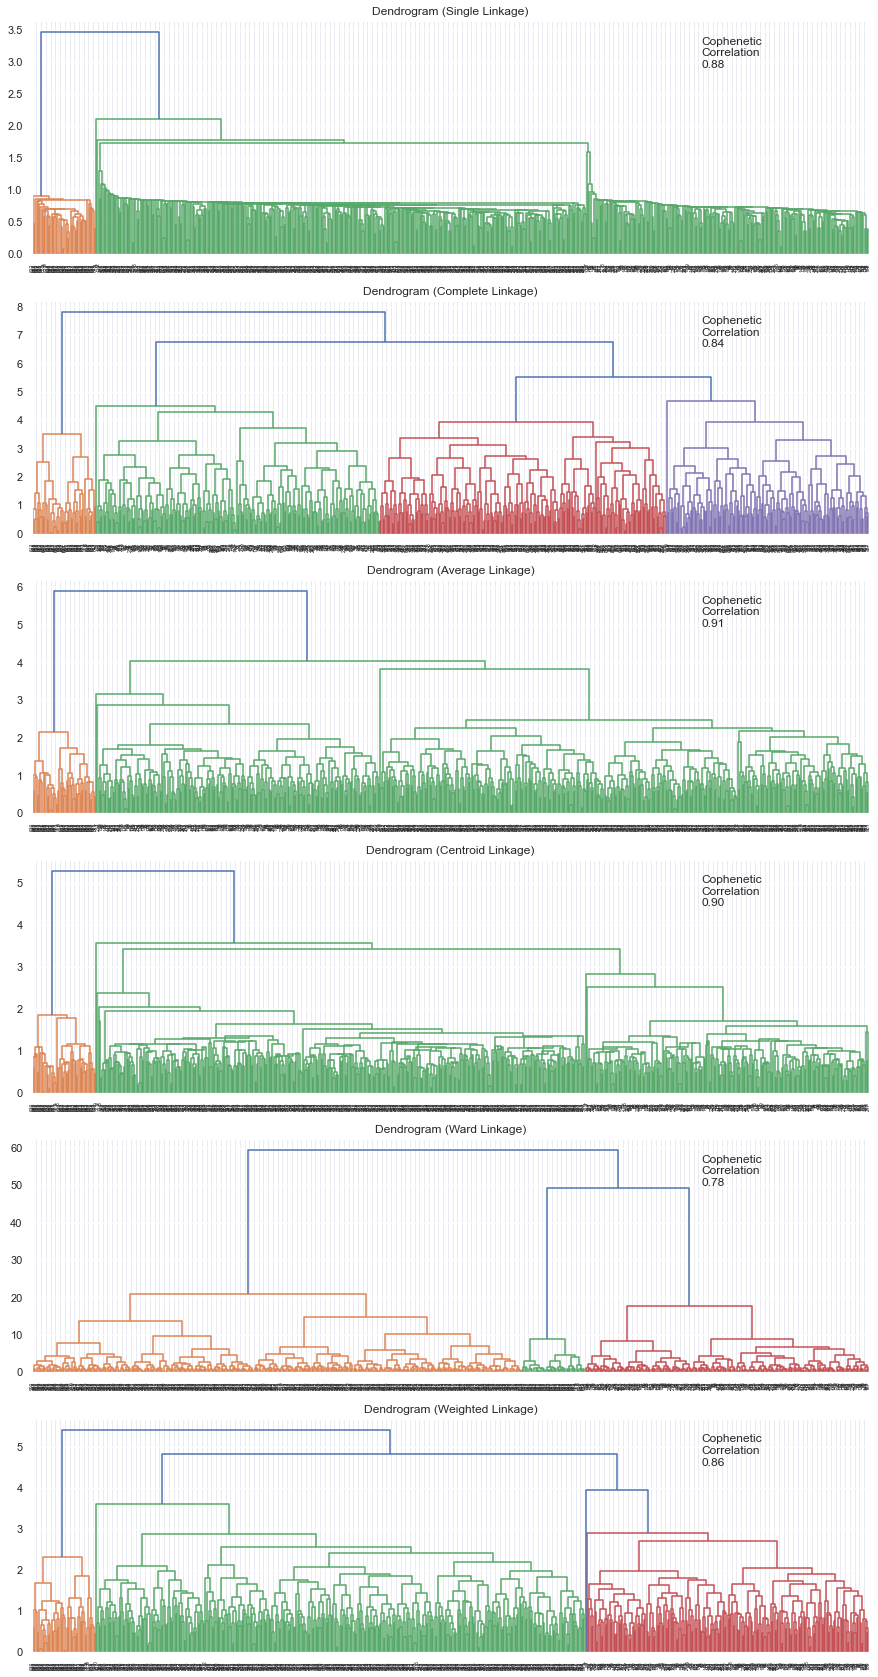

In [48]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

* We can imagine a horizontal line - our goal is to draw that line and find the vertical intersections where clear clusters are formed
* Cophenetic correlation is highest for average linkage, with centroid and weighted linkage close behind
* We will use average linkage going forward
* The optimal number of clusters appears to be 3
* The colors and how they are separated (SKLearn library includes this)

#### Clustering with euclidean distance and ward linkage

In [49]:
HCmodel = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
HCmodel.fit(scaled_df)

AgglomerativeClustering(n_clusters=3)

In [50]:
cluster_cols = ['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

In [51]:
scaled_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

In [52]:
df.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments,HC_Clusters
0,87073,100000.0,2,1,1.0,0,2,0
1,38414,50000.0,3,0,8.5,9,1,1
2,17341,50000.0,7,1,3.0,4,2,0
3,40496,30000.0,5,1,1.0,4,2,0
4,47437,100000.0,6,0,8.5,3,0,2


In [53]:
HCcluster_profile = df.groupby("HC_Clusters").mean()

In [54]:
HCcluster_profile["count_in_each_segments"] = (
    df.groupby("HC_Clusters")["Avg_Credit_Limit"].count().values
)

In [55]:
# lets display cluster profile
HCcluster = HCcluster_profile.style.highlight_max(color="lightgreen", axis=0)
HCcluster

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,,
0,54881.329016,33782.383420,5.515544,3.489637,0.981865,2.000000,2.000000,386
1,55239.830357,12174.107143,2.410714,0.933036,3.546875,6.870536,1.000000,224
2,56708.760000,102660.000000,8.740000,0.600000,8.180000,1.080000,0.000000,50


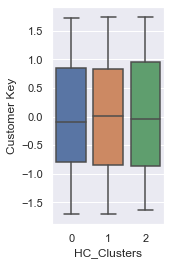

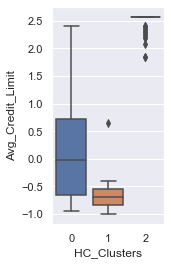

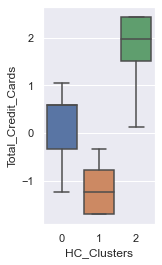

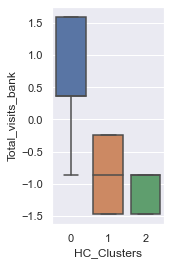

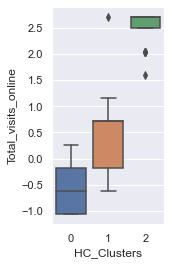

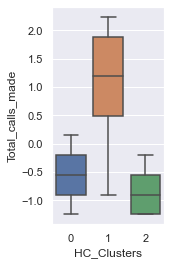

<bound method Figure.tight_layout of <Figure size 1080x2160 with 6 Axes>>

In [56]:
scaled_cols = ['Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

for col in scaled_cols:
    #fig, axes = plt.subplots(2,4, figsize = (20,35))
    plt.figure(figsize = (2, 4))
    sns.boxplot(x = "HC_Clusters", y = col, data = scaled_df)
    plt.show()
    
fig.tight_layout

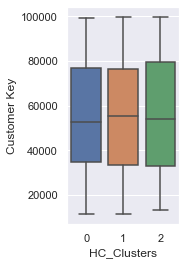

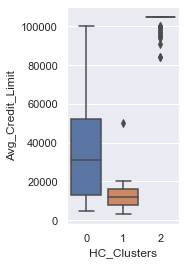

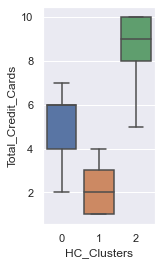

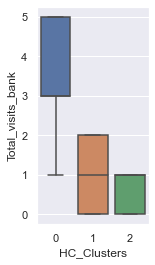

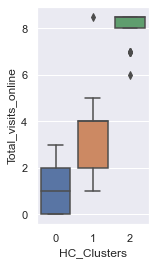

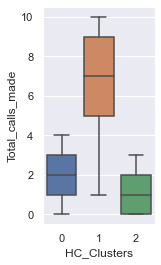

<bound method Figure.tight_layout of <Figure size 1080x2160 with 6 Axes>>

In [57]:
scaled_cols = ['Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

for col in scaled_cols:
    #fig, axes = plt.subplots(2,4, figsize = (20,35))
    plt.figure(figsize = (2, 4))
    sns.boxplot(x = "HC_Clusters", y = col, data = df)
    plt.show()
    
fig.tight_layout

<AxesSubplot:xlabel='HC_Clusters'>

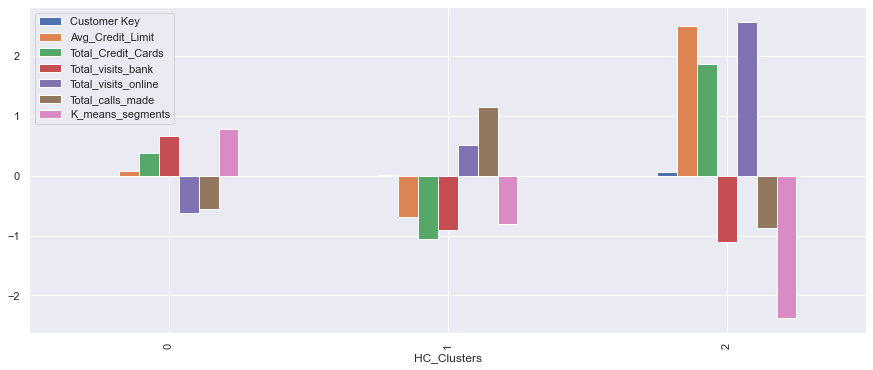

In [58]:
scaled_df.groupby("HC_Clusters").mean().plot.bar(figsize=(15, 6))

Cluster 0 is characterized by: 
* slightly above average credit limits
* Above average visits to the bank and total credit cards
* below average total visits to physical locations and total calls made
* insight: these are highly engaged customers who have more activity and require less physical touchpoints

Cluster 1 is characterized by: 
* below average credit limits, total credit cards, and total bank visits
* above average total online visits and total calls made
* insight: these customers are less engaged and require more high touch activities (calls)

Cluster 2 is characterized by: 
* very high credit limits, online visits, and total credit cards
* below average total bank visits and total calls made
* insight: these customers have average engagement but require a little more in person engagement, but less calls made and less online activity

### Compare to Kmeans Clusters

<AxesSubplot:xlabel='K_means_segments'>

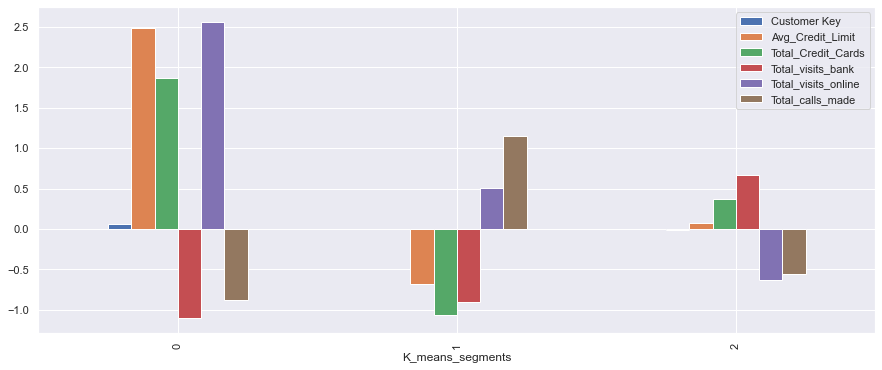

In [59]:
scaled_df_ol.groupby("K_means_segments").mean().plot.bar(figsize=(15, 6))

We can see that cluster 0 of our hierarchical cluster is very similar to cluster 2 of kmeans
Cluster 1 in each graph are also very similar
Cluster 2 in our HCcluster is very similar to Cluster 0 in kmeans

Zooming in on distro of observations for avg credit limit

<AxesSubplot:xlabel='HC_Clusters', ylabel='Avg_Credit_Limit'>

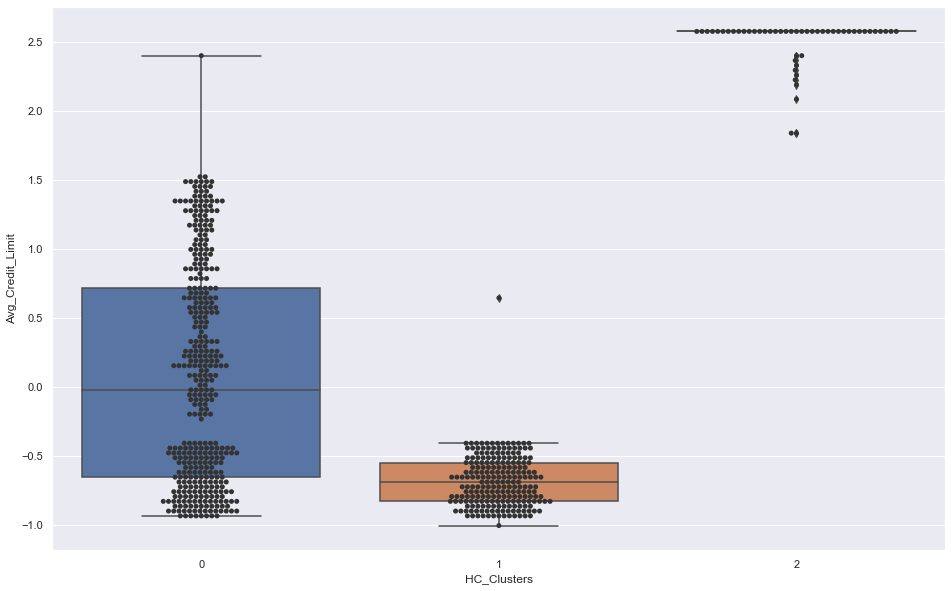

In [60]:
# overlaying a swarmplot to get a better understanding of distribution
plt.figure(i)
sns.boxplot(x="HC_Clusters", y = "Avg_Credit_Limit", data=scaled_df)
sns.swarmplot(x="HC_Clusters", y= "Avg_Credit_Limit", data=scaled_df, color=".2")

In [61]:
pd.crosstab(df.HC_Clusters, df.Avg_Credit_Limit).style.highlight_max(color="lightgreen", axis=0)

Avg_Credit_Limit,3000.0,5000.0,6000.0,7000.0,8000.0,9000.0,10000.0,11000.0,12000.0,13000.0,14000.0,15000.0,16000.0,17000.0,18000.0,19000.0,20000.0,25000.0,26000.0,27000.0,28000.0,29000.0,30000.0,31000.0,32000.0,33000.0,34000.0,35000.0,36000.0,37000.0,38000.0,39000.0,40000.0,41000.0,42000.0,43000.0,44000.0,45000.0,46000.0,47000.0,48000.0,49000.0,50000.0,51000.0,52000.0,54000.0,55000.0,56000.0,57000.0,58000.0,59000.0,60000.0,61000.0,62000.0,63000.0,64000.0,65000.0,66000.0,67000.0,68000.0,69000.0,70000.0,71000.0,72000.0,73000.0,74000.0,75000.0,84000.0,91000.0,94000.0,95000.0,96000.0,97000.0,98000.0,99000.0,100000.0,105000.0
HC_Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,8,14,11,15,10,12,9,10,10,9,6,9,10,14,13,7,1,5,2,3,5,6,5,2,4,6,2,11,6,8,7,3,6,2,1,3,3,3,6,6,4,7,4,6,4,1,7,3,3,4,5,3,3,2,4,5,4,3,7,4,10,4,3,4,6,2,0,0,0,0,0,0,0,0,1,0
1,1,13,17,13,20,18,14,15,8,18,14,11,13,13,9,13,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,1,1,1,1,2,39


## Dimensionality Reduction using PCA for visualization

- Let's use PCA to reduce the data to two dimensions and visualize it to see how well-separated the clusters are.

In [62]:
covMatrix = np.cov(scaled_df, rowvar = False)
print(covMatrix)

[[ 1.00151745e+00  7.41938505e-02 -1.02961020e-02 -5.60374991e-04
   1.00935375e-02  5.97740222e-03 -1.67194413e-02  1.05932209e-02]
 [ 7.41938505e-02  1.00151745e+00  6.17405844e-01 -1.71957633e-02
   3.35626413e-01 -4.53390312e-01 -2.29792073e-01  1.45593274e-01]
 [-1.02961020e-02  6.17405844e-01  1.00151745e+00  3.16275257e-01
   4.29144289e-02 -6.52239740e-01  1.22464041e-01 -7.75916264e-02]
 [-5.60374991e-04 -1.71957633e-02  3.16275257e-01  1.00151745e+00
  -6.13316799e-01 -5.06783706e-01  7.48481629e-01 -4.74228242e-01]
 [ 1.00935375e-02  3.35626413e-01  4.29144289e-02 -6.13316799e-01
   1.00151745e+00  2.44140997e-01 -8.87425426e-01  5.62261228e-01]
 [ 5.97740222e-03 -4.53390312e-01 -6.52239740e-01 -5.06783706e-01
   2.44140997e-01  1.00151745e+00 -4.06538048e-01  2.57577229e-01]
 [-1.67194413e-02 -2.29792073e-01  1.22464041e-01  7.48481629e-01
  -8.87425426e-01 -4.06538048e-01  1.00151745e+00 -6.34548453e-01]
 [ 1.05932209e-02  1.45593274e-01 -7.75916264e-02 -4.74228242e-01
   

In [63]:
# importing library
from sklearn.decomposition import PCA

# setting the number of components to 2
pca = PCA(n_components=2)

# transforming data and storing results in a dataframe
X_reduced_pca = pca.fit_transform(scaled_df)
reduced_df_pca = pd.DataFrame(
    data=X_reduced_pca, columns=["Component 1", "Component 2"]
)

In [64]:
pca = PCA(n_components=6)
pca.fit(scaled_df)

PCA(n_components=6)

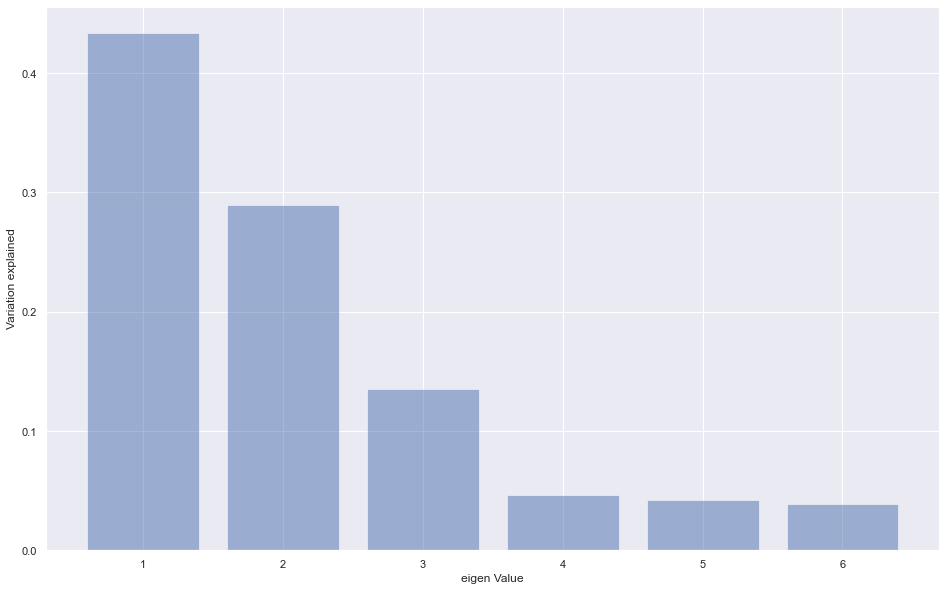

In [65]:
plt.bar(list(range(1,7)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

We can see above that with just 3 variables derived from PCA, we can explain about 85% of the variability in our dataset

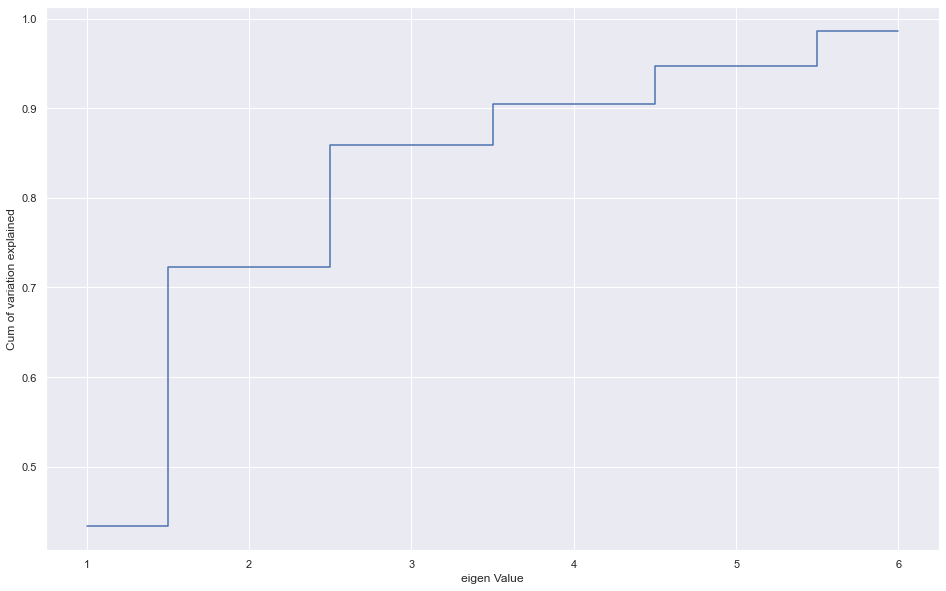

In [66]:
plt.step(list(range(1,7)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

Adding one more variable (total = 4) brings us to 90%

In [67]:
# checking eigen value for explained variance
print(pca.explained_variance_)

[3.21745308 2.1448578  1.00497272 0.3447419  0.3101609  0.28687093]


In [68]:
# checking the amount of variance explained 
pca.explained_variance_ratio_.sum()

0.9860230433675633

<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

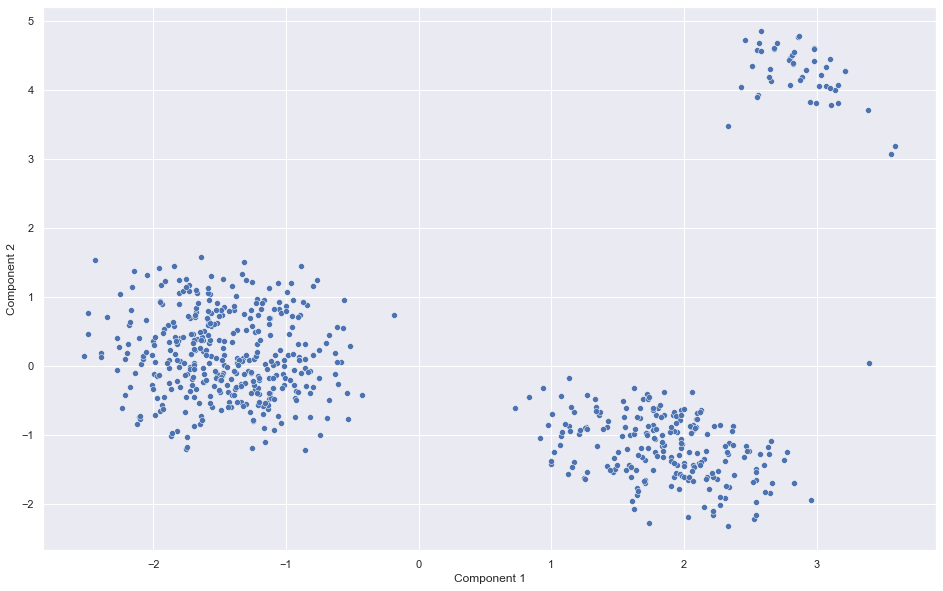

In [69]:
sns.scatterplot(data=reduced_df_pca, x="Component 1", y="Component 2")

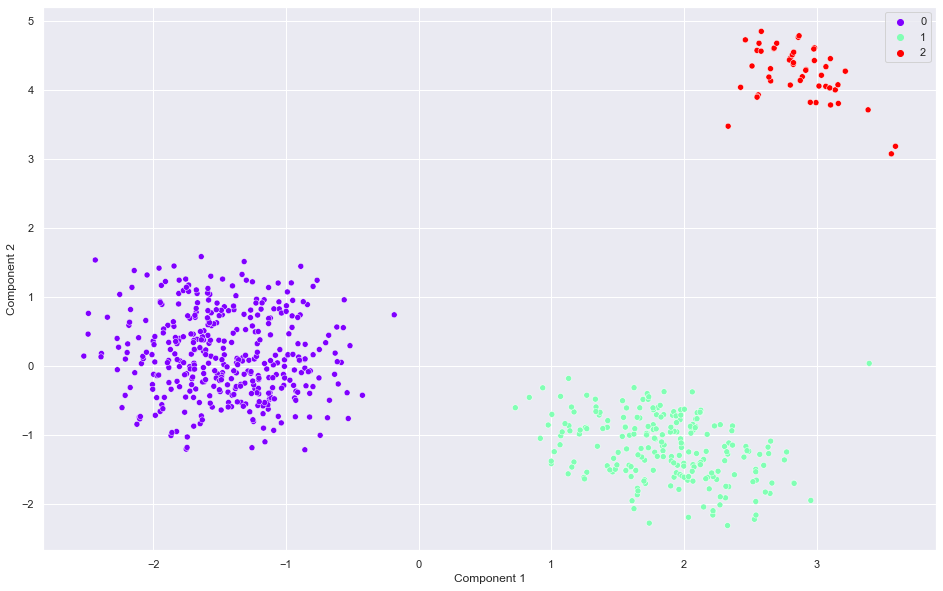

In [70]:
# let us use some color coding to see the groups more distinctly
sns.scatterplot(
    data=reduced_df_pca,
    x="Component 1",
    y="Component 2",
    hue=df["HC_Clusters"],
    palette="rainbow",
)
plt.legend(bbox_to_anchor=(1, 1))

We can also see that by reducing dimensionality, we can clearly visualize 3 unique and separable clusters

## Business Recommendations

#### Summary of customer segments (hierarchical clustering)

Segment 1: Cluster 0 is characterized by: 
* slightly above average credit limits
* Above average visits to the bank and total credit cards
* below average total visits to physical locations and total calls made
* insight: these are highly engaged customers who have more activity and require less physical touchpoints

Segment 2: Cluster 1 is characterized by: 
* below average credit limits, total credit cards, and total bank visits
* above average total online visits and total calls made
* insight: these customers are less engaged and require more high touch activities (calls)

Segment 3: Cluster 2 is characterized by: 
* very high credit limits, online visits, and total credit cards
* below average total bank visits and total calls made
* insight: these customers have average engagement but require a little more in person engagement, but less calls made and less online activity

#### Recommendations

Using clustering techniques revealed 3 very distinct customer segments that represent unique sources of value for the bank - we recommend the following: 
* Customers in segment 1 have slightly higher credit limits and above average visits to the bank and total number of credit cards, representing lower value due to the cost of physical infrastructure and administrative expenses for each card type. Management should assess the customer lifetime value and develop promotions to increase engagement (as measured by transaction activity and amount) and incent online banking. Doing so will result in greater margin given that this segment doesn't represent a large source of interest income. 
* Customers in segment 2 have below average credit limits, total credit cards, and total visits to the bank and require more calls. These customers represent a marginal source of value given the high touch model of relationship management. Management should consider automating service calls and bringing such engagement into the online platform. Some of the same techniques employed in customer segment 1 are salient here as well - incenting activity and online engagement. <strong> Management should assess the business value of this segment and consider if resources dedicated to this segment should be diverted elsewhere.</strong>
* Customers in segment 3 represent our high value customers as characterized by their very high levels of engagement (an assumedly interest income) and the low touch required to maintain the relationship. Management should deepen these relationships with incentive programs, special perks such as a concierge service, and anticipation of user needs (we suggest conducting user research to uncover the functional, social, and emotional needs of the customer to build a lasting relationship). 

##### Additionally, we recommend developing a strategy to nurture customers in segments 1 and 2 as they progress in their customer journey so that they can migrate up to the high value customer segment. 

Management should consider the following: 
* identify the key elements and assumptions of the ML model and periodically monitor to determine performance
* ML failures are often difficult to detect - management should put systems in place to monitor model performance over time
* Some other factors to consider are training-serving skew where inputs aren't similar enough to the data the model was performed on and data drift where the distribution of model features shifts, decaying model performance
* Management has the ultimate responsibility for monitoring the data pipeline and model outputs - we recommend and independent review of the model on a periodic basis to ensure compliance with regulations surrounding credit cards